In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
# Due to ethical issues with the Boston housing dataset, we will use the alternative California housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)


# Add the target column
housing_df['Target'] = housing.target

# Explore the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Exploratory Data Analysis




# 1. General information

Data types, number of rows and columns, and missing values.


In [3]:
housing_df.info()
print(f"\nNumber of rows: {housing_df.shape[0]}")
print(f"Number of columns: {housing_df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Number of rows: 20640
Number of columns: 9


**Observations:**
- All variables are of type `float64`.
- There are no missing values.
- The dataset contains 20,640 rows and 9 columns (8 features + 1 target variable).


# 2. Statistical summary of features

We explore basic statistics of each variable.

In [4]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


**MedInc**: High variation, can be a strong predictor.

**AveRooms** / **AveBedrms**: Extreme outliers.

**Target**: Wide price range

## 2.1 Feature Distributions and Relationships


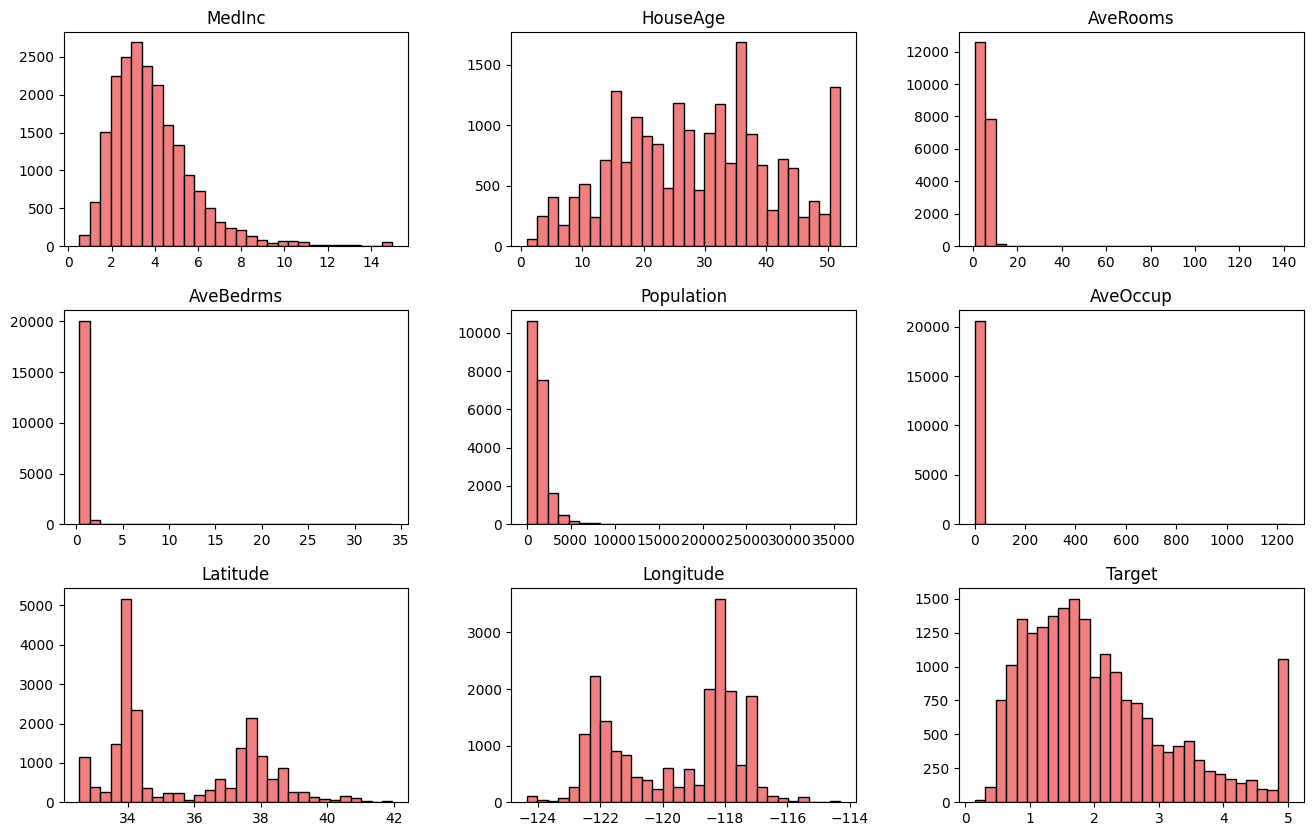

In [5]:
# Histogram
housing_df.hist(figsize=(16, 10), bins=30, grid = False, color = "lightcoral", edgecolor = "black")
plt.show()

**Target**  shows a right-skewed distribution with a clear threshold effect, since all housing prices above 5 are capped at that value.

**HouseAge** shows many older houses.

**MedInc** has a right-skewed distribution.

Most variables, such as **AveBedrms** and **Population**, have a pronounced right-skew.

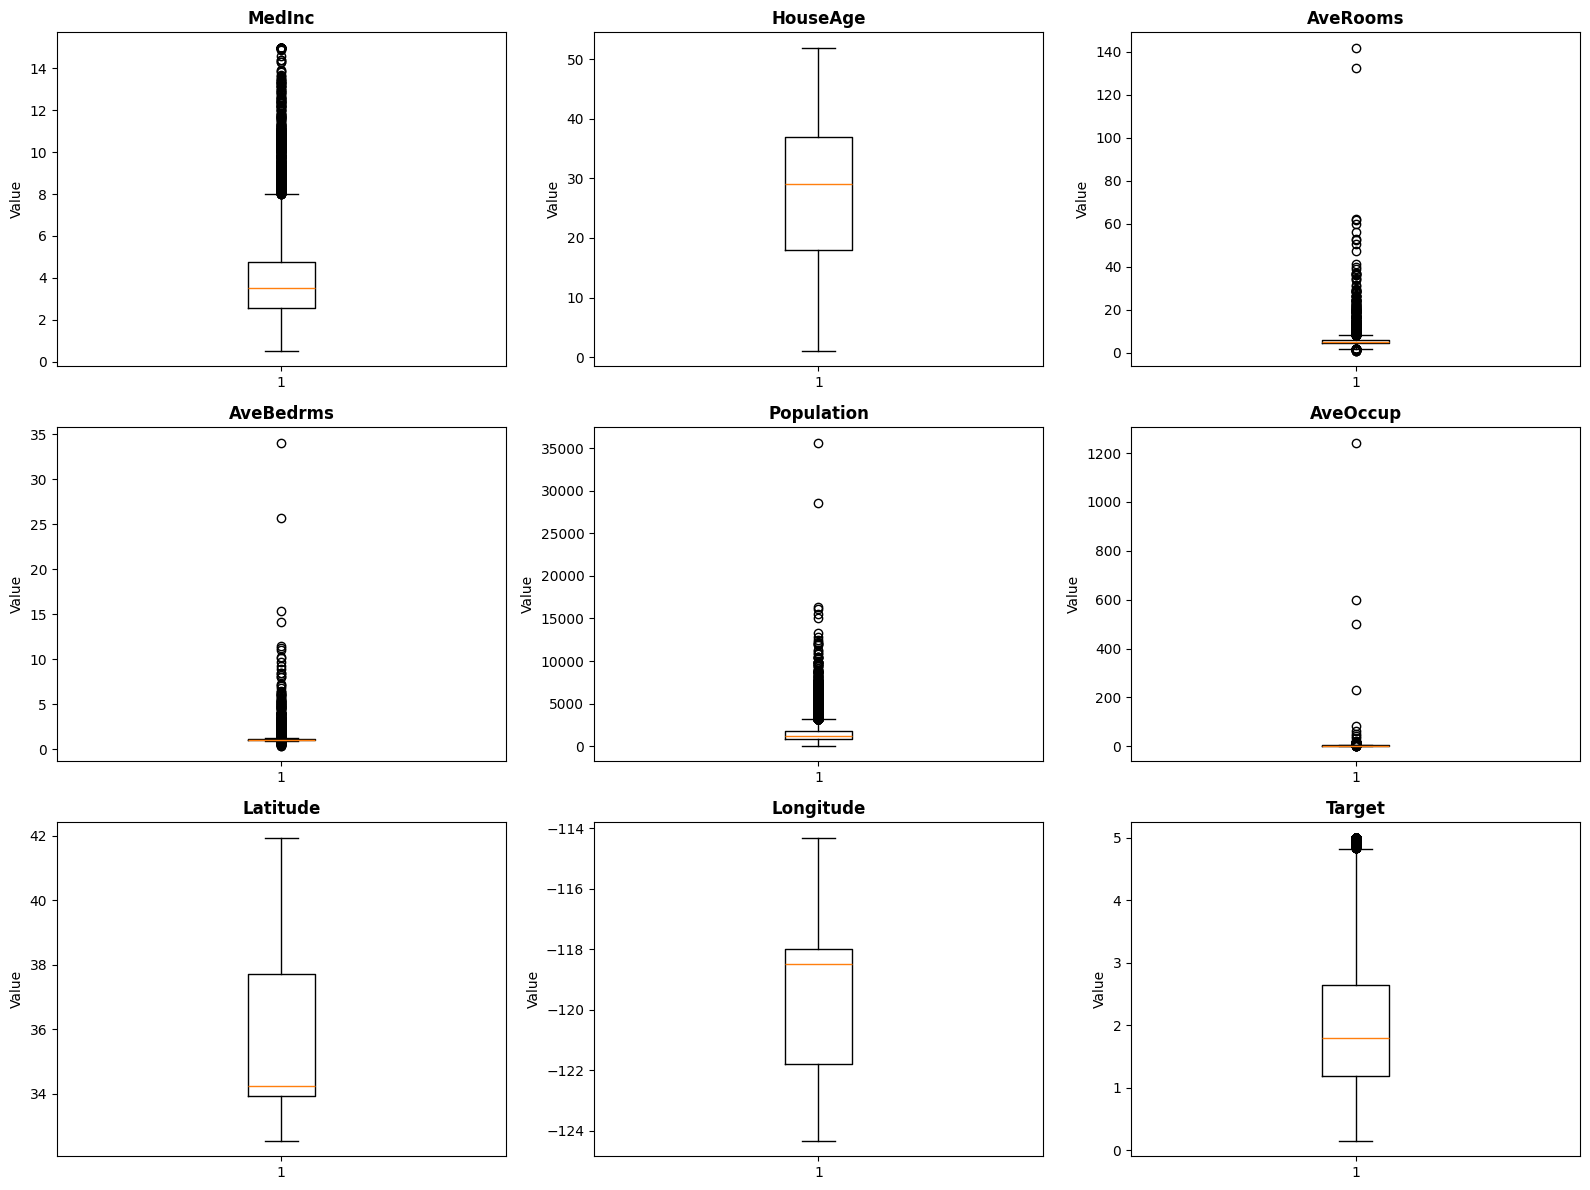

In [6]:
# Boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(housing_df.columns):
    axes[i].boxplot(housing_df[col])
    axes[i].set_title(col, fontweight="bold")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

Except for **HouseAge**, **Latitude**, and **Longitude**, the variables present outliers.

Outliers are especially noticeable in **AveBedrms**, **AveRooms**, and Population distributions.

For the **Target**, we observe outliers very close to the third quartile (Q3).



## 2.2 Correlation Heatmap


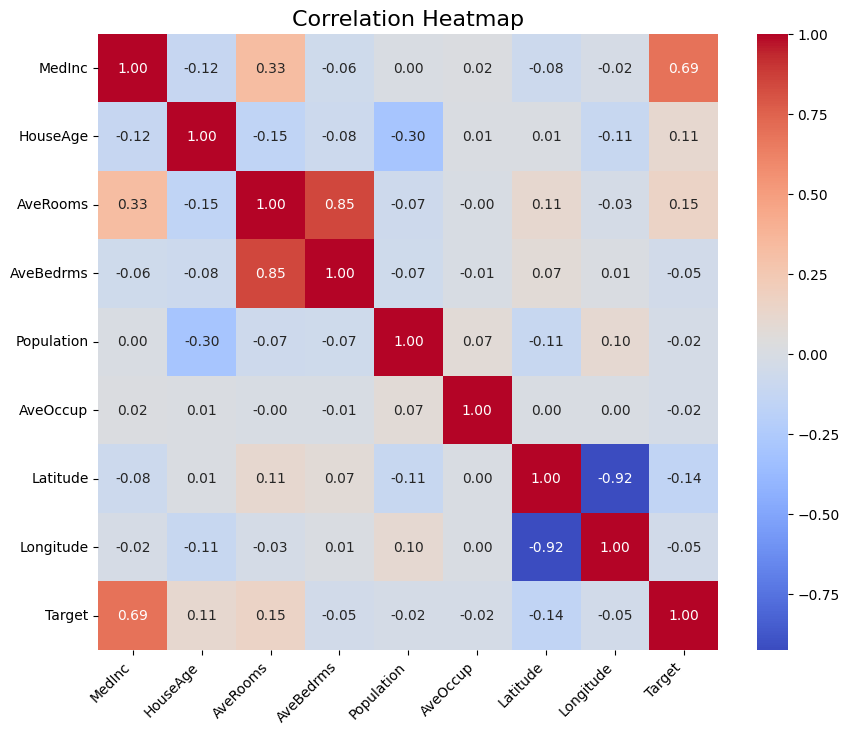

In [7]:
corr_matrix = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


**MedInc** is the most relevant variable for Target.

**AveRooms** and **AveBedrms** are highly correlated; consider reviewing them to avoid redundancy.

**Latitude** and **Longitude** are strongly correlated with each other.

The rest of the variables have low correlations and little direct influence.

## 2.3 Other Graphs of Interest

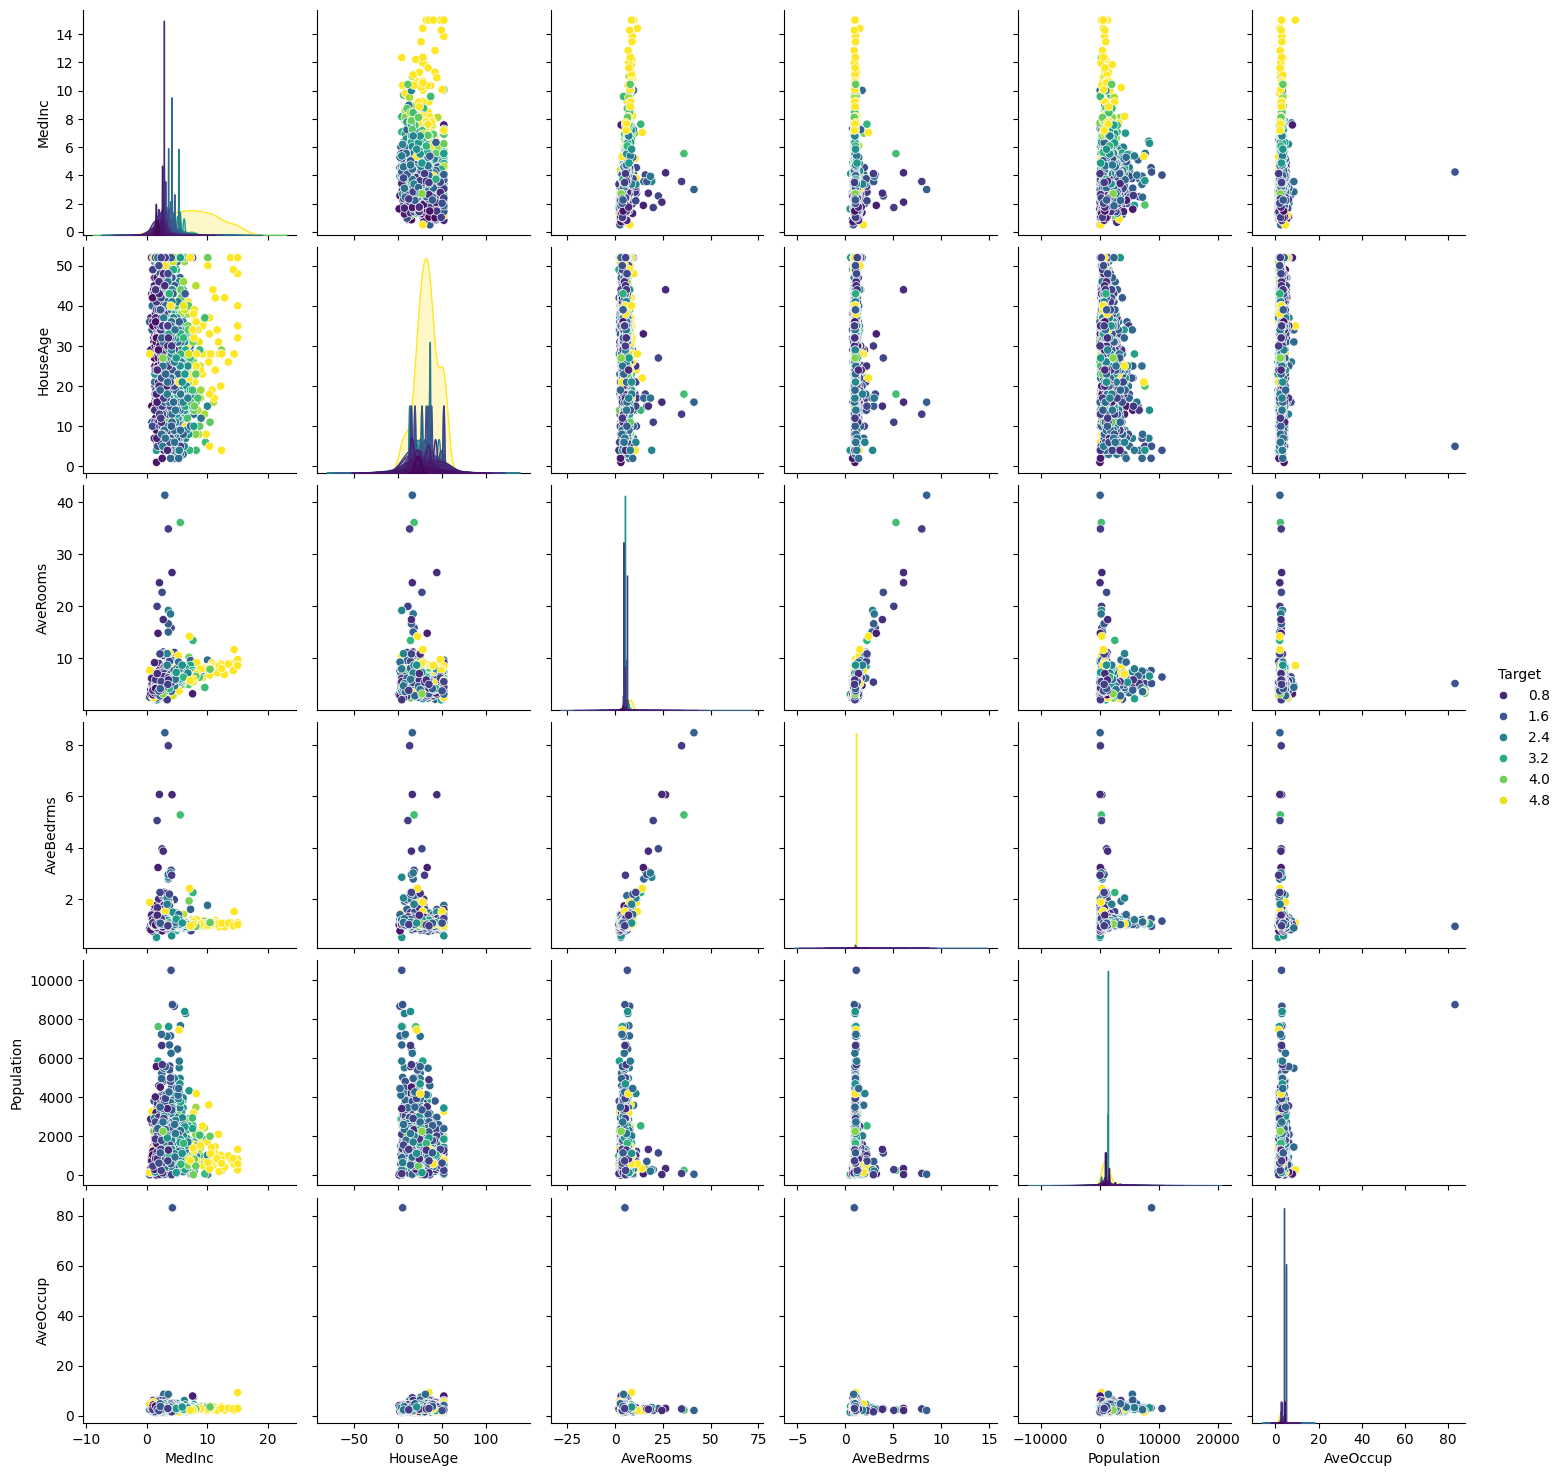

In [8]:
housing_df_pair = housing_df.drop(columns = ["Latitude", "Longitude"])
subset = housing_df_pair.sample(frac=0.1, random_state=42)
sns.pairplot(subset, hue="Target", palette="viridis")



This plot confirms some previous observations, such as the presence of outliers, and it clearly shows that **MedInc** is the variable most strongly related to the **target**.

## 2.4 Feature selection & cleaning

In this section, we removed all outliers and dropped the column **AveRooms** since it was redundant with **AveBedrms**. Additionally, because **Latitude** and **Longitude** were highly correlated, we applied PCA to combine them into a single component and reduce multicollinearity.

In [9]:
#PCA
coor = housing_df[["Latitude", "Longitude"]]
scaler = StandardScaler()
coor_scaled = scaler.fit_transform(coor)
pca = PCA(n_components=1)
housing_df["Coor_PCA1"] = pca.fit_transform(coor_scaled)

housing_df.drop(columns=["Latitude", "Longitude"], inplace=True)


#Outliers
Q1 = housing_df.quantile(0.25)
Q3 = housing_df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
housing_df_no_outliers = housing_df[~((housing_df < lower) | (housing_df > upper)).any(axis=1)]
print(f"A total of {housing_df.shape[0]-housing_df_no_outliers.shape[0]} rows have been removed, which is {(housing_df.shape[0]-housing_df_no_outliers.shape[0])/housing_df.shape[0]*100:.2f}% of the dataset")


housing_df_no_outliers = housing_df_no_outliers.drop(columns=["AveRooms"])
housing_df = housing_df.drop(columns=["AveRooms"])




A total of 4328 rows have been removed, which is 20.97% of the dataset


#3. Regression modeling

In [10]:

X = housing_df.drop(columns=["Target"])
y = housing_df["Target"]

X = sm.add_constant(X) # Intercept

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)
residuals = y_test  - y_pred


print("\nMean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nStadistics with test data")
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2946.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:26:25   Log-Likelihood:                -19815.
No. Observations:               16512   AIC:                         3.964e+04
Df Residuals:                   16505   BIC:                         3.970e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2514      0.032     -7.871      0.0

Since there are many outliers, we will try building the model with the outliers included to see if it improves the performance.

In [11]:
X = housing_df_no_outliers.drop(columns=["Target"])
y = housing_df_no_outliers["Target"]

X = sm.add_constant(X) # Intercept

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)
residuals = y_test  - y_pred

print("\nMean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nStadistics with test data")
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2413.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:26:25   Log-Likelihood:                -12919.
No. Observations:               13049   AIC:                         2.585e+04
Df Residuals:                   13042   BIC:                         2.591e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1075      0.108     -0.991      0.3

In this case the secondo model without the outliers has a better performance and hace a higher r squared and all the features are significant to the model.

Now, I will present some visualizations of this model to better illustrate its performance and residual behavior.

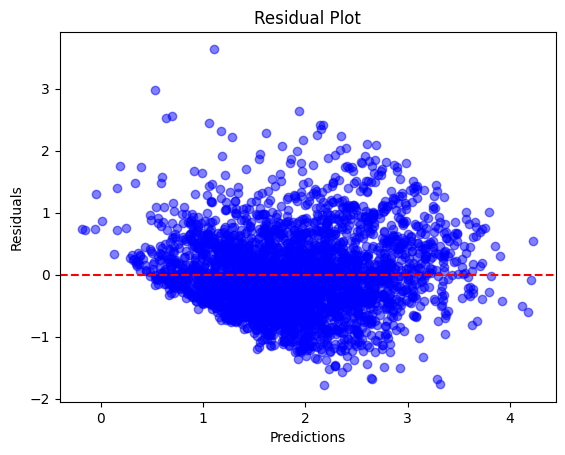

In [12]:
plt.scatter(y_pred, residuals, alpha=0.5, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

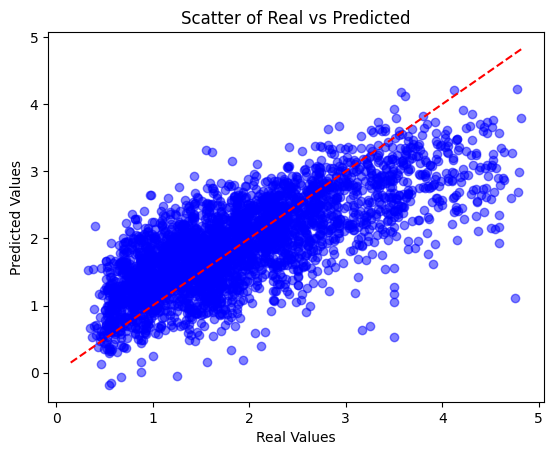

In [13]:
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Scatter of Real vs Predicted")
plt.show()


We observe that, probably because we removed the outliers of **Target**, the model tends to underestimate the high values. There is also some dispersion, indicating noticeable errors.